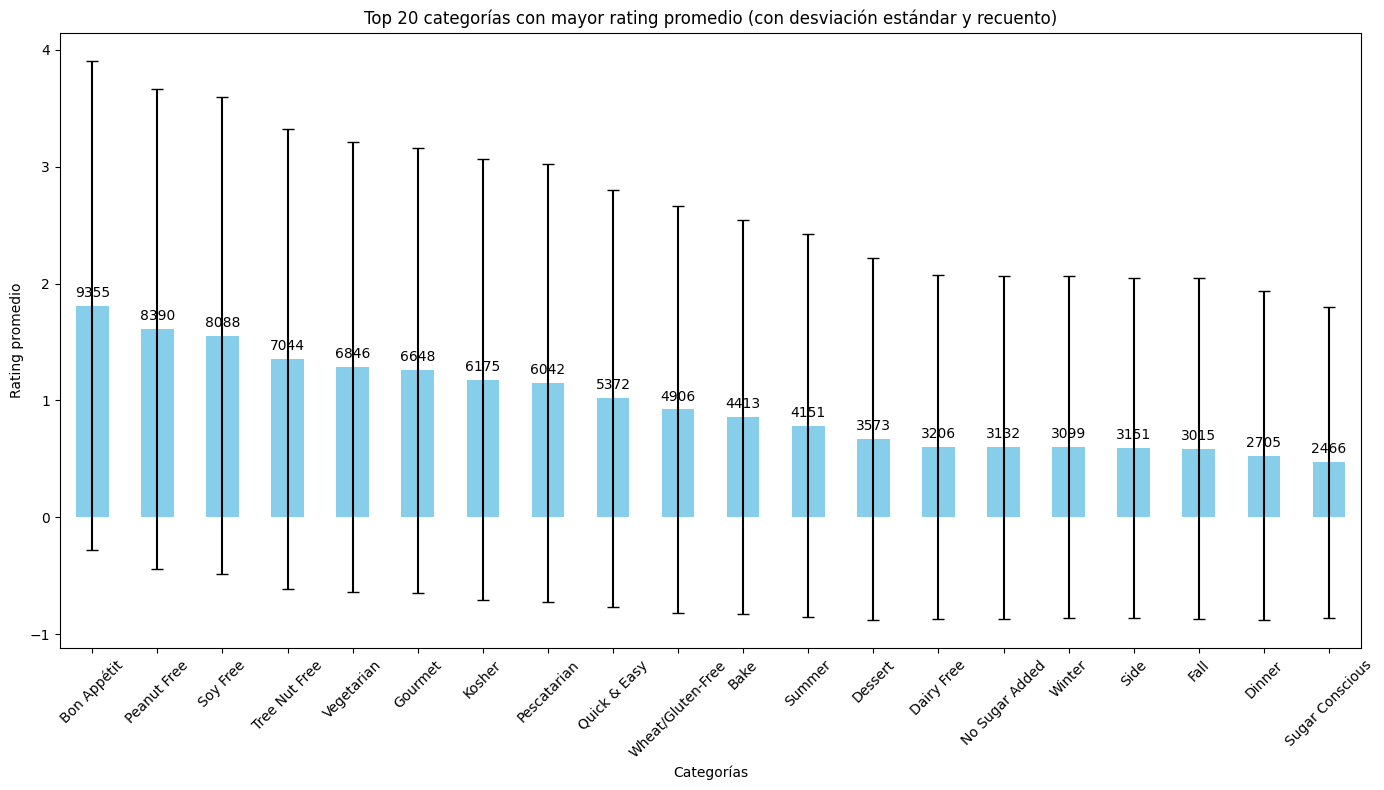

Top 20 categorías con mayor rating promedio:
                   Mean Rating   Std Dev  Recipe Count
Bon Appétit           1.811909  2.092948          9355
Peanut Free           1.613868  2.050949          8390
Soy Free              1.555659  2.036329          8088
Tree Nut Free         1.353669  1.968161          7044
Vegetarian            1.286132  1.926795          6846
Gourmet               1.258364  1.902476          6648
Kosher                1.177612  1.887477          6175
Pescatarian           1.149720  1.874308          6042
Quick & Easy          1.019527  1.781908          5372
Wheat/Gluten-Free     0.924036  1.742507          4906
Bake                  0.858178  1.683207          4413
Summer                0.782214  1.637504          4151
Dessert               0.673694  1.548928          3573
Dairy Free            0.601803  1.470110          3206
No Sugar Added        0.601710  1.466806          3132
Winter                0.599347  1.461922          3099
Side                

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

path_to_json = 'full_format_recipes.json'
data = pd.read_json(path_to_json)

data_clean = data.dropna(subset=['rating'])

# Procesar las categorías (asegurar que 'categories' esté en formato de listas)
# Convierte las categorías de strings separadas por comas a listas
if isinstance(data_clean['categories'][0], str):
    data_clean['categories'] = data_clean['categories'].apply(eval)

# Convertir las categorías en variables binarias
mlb = MultiLabelBinarizer()
categories_encoded = pd.DataFrame(
    mlb.fit_transform(data_clean['categories']),
    columns=mlb.classes_,
    index=data_clean.index
)

# Añadir las categorías codificadas al DataFrame original
data_clean = pd.concat([data_clean, categories_encoded], axis=1)

# Calcular el promedio del rating por categoría
categories_mean = data_clean[mlb.classes_].multiply(data_clean['rating'], axis=0).mean()

# Calcular la desviación estándar del rating por categoría
categories_std = data_clean[mlb.classes_].multiply(data_clean['rating'], axis=0).std()

# Calcular el número de recetas por categoría
categories_count = data_clean[mlb.classes_].sum()

# Crear un DataFrame combinado para facilitar la visualización
categories_stats = pd.DataFrame({
    'Mean Rating': categories_mean,
    'Std Dev': categories_std,
    'Recipe Count': categories_count
}).sort_values(by='Mean Rating', ascending=False)

# Visualizar las 25 categorías más importantes con su desviación estándar
top_categories_stats = categories_stats.head(20)

# Graficar el promedio y la desviación estándar
plt.figure(figsize=(14, 8))
bars = top_categories_stats['Mean Rating'].plot(
    kind='bar',
    color='skyblue',
    yerr=top_categories_stats['Std Dev'],
    capsize=4,
    legend=False
)
plt.title('Top 20 categorías con mayor rating promedio (con desviación estándar y recuento)')
plt.xlabel('Categorías')
plt.ylabel('Rating promedio')
plt.xticks(rotation=45)

# Añadir etiquetas para el número de recetas sobre cada barra
for bar, count in zip(bars.patches, top_categories_stats['Recipe Count']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{int(count)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Imprimir las estadísticas de las 20 categorías más importantes
print("Top 20 categorías con mayor rating promedio:")
print(top_categories_stats)

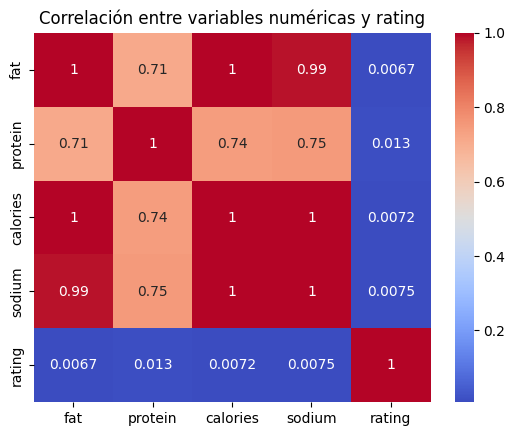

In [ ]:
data[['fat', 'protein', 'calories', 'sodium']] = data[['fat', 'protein', 'calories', 'sodium']].fillna(0)

# Eliminar filas sin rating
data = data.dropna(subset=['rating'])

# Convertir listas a strings en categorías
data['categories'] = data['categories'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))

# Seleccionar solo variables numéricas para correlaciones
numerical_features = ['fat', 'protein', 'calories', 'sodium']
correlation_data = data[numerical_features + ['rating']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas y rating")
plt.show()